## Data analysis for titanic dataset

type: classification
output variable: survived

### Import all the libraries

In [13]:
import pandas as pd
print("pandas version: {}".format(pd.__version__))

import matplotlib
import matplotlib.pyplot as plt
print("matplotlib version: {}".format(matplotlib.__version__))

import seaborn as sns
print("seaborn version: {}".format(sns.__version__))

pd.options.mode.chained_assignment = None #default = 'warn

pandas version: 2.2.2
matplotlib version: 3.9.1
seaborn version: 0.13.2


In [11]:
# loading train/test data
df_train = pd.read_csv("../data/train.csv")
df_test = pd.read_csv("../data/test.csv")

### looking into data

In [14]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [17]:
# predicting if the survival column
df_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


### creating statistical report for numeric fetures

In [20]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [21]:
df_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


results: statistical report of numerica features
1. train had 891 rows were as test has 418 rows
2. the passenger id is consecutively numbers and will not add any value to our ML algorithm
3. Feature Age has missing values
4. the mean of survival is 0.38 hence we know 38% survived
5. 75% people are below 38 yr age max is 80 year old
6. more then 75% travel without parents or childer (75% percentile of parch == 0)
7. minimum fare is 0 -> maybe kinds don't pay 
8. test dataset has missing values (417 instead of 418)

### creating statistical report for categorical fetures

In [23]:
df_train.describe(include=['O']).transpose()

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


In [24]:
df_test.describe(include=['O']).transpose()

,count,unique,top,freq
Name,418,418,"Kelly, Mr. James",1
Sex,418,2,male,266
Ticket,418,363,PC 17608,5
Cabin,91,76,B57 B59 B63 B66,3
Embarked,418,3,S,270


Report
1. all names are unique
2. not all ticket number are unique

## Key questions for the data analysis

In [25]:
def pivot_survival_rate(df_train,target_column):
    df_pivot = pd.pivot_table(
        df_train[['PassengerId',target_column,'Survived']],
                 index =[target_column],
                 columns=["Survived"],
                 aggfunc='count',
                 fill_value=0
    ).reset_index()

    df_pivot.columns = [target_column, 'not_survived','survived']
    
    df_pivot['passengers'] = df_pivot['not_survived']+df_pivot['survived']
    
    df_pivot['survived_rate'] = df_pivot['survived']/df_pivot['passengers']*100
    
    print(df_pivot.to_markdown())

### had older passengers and children have a higher chance of survival?

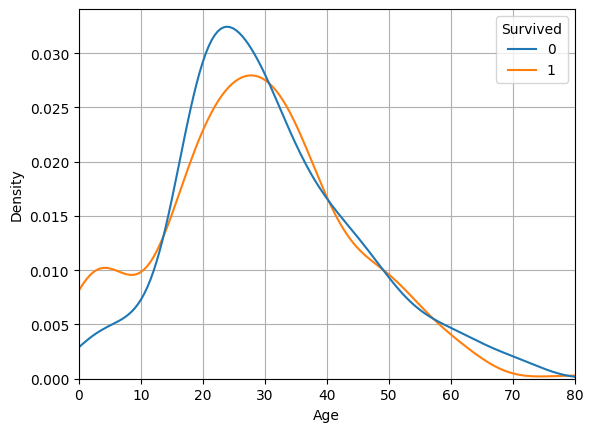

In [29]:
# univariate distribution plot: "Age"
# common_norm=False distribtion of survived and not survived passengers sum up to 1
sns.kdeplot(data=df_train,x='Age',hue='Survived', common_norm=False)

plt.xlim(0,df_train['Age'].max())

plt.grid()
plt.show()



1. below 12 years has more chance to survive
2. above 60 has low chance to survive

In [30]:
# create age category and calculate survival rate
def age_category(row):
    
    if row<12:return 'children'
    if (row>=12) and (row<60): return 'adult'
    if row >= 60: return 'senior'
    else: return 'no age'

df_train['Age_category'] = df_train['Age'].apply(lambda row: age_category(row))
df_test['Age_category'] = df_test['Age'].apply(lambda row: age_category(row))

In [32]:
pivot_survival_rate(df_train, "Age_category")

|    | Age_category   |   not_survived |   survived |   passengers |   survived_rate |
|---:|:---------------|---------------:|-----------:|-------------:|----------------:|
|  0 | adult          |            376 |        244 |          620 |         39.3548 |
|  1 | children       |             29 |         39 |           68 |         57.3529 |
|  2 | no age         |            125 |         52 |          177 |         29.3785 |
|  3 | senior         |             19 |          7 |           26 |         26.9231 |


### did higher pclass also a high chance of survival?

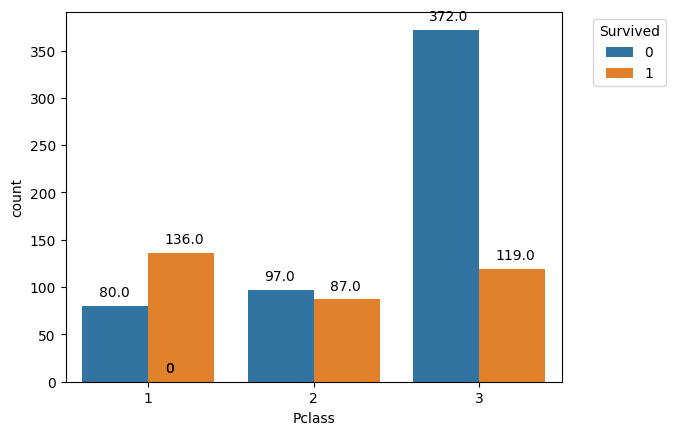

In [33]:
ax = sns.countplot(data=df_train, x='Pclass', hue='Survived')

#show numbers above the bars
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x() + 0.1, p.get_height()+10))

ax.legend(title='Survived',bbox_to_anchor=(1.05,1),loc='upper left')

plt.show()

most people survived from first class then third class

In [34]:
pivot_survival_rate(df_train,"Pclass")

|    |   Pclass |   not_survived |   survived |   passengers |   survived_rate |
|---:|---------:|---------------:|-----------:|-------------:|----------------:|
|  0 |        1 |             80 |        136 |          216 |         62.963  |
|  1 |        2 |             97 |         87 |          184 |         47.2826 |
|  2 |        3 |            372 |        119 |          491 |         24.2363 |


### Did passengers that paid a higher fare also had a higher survival rate?

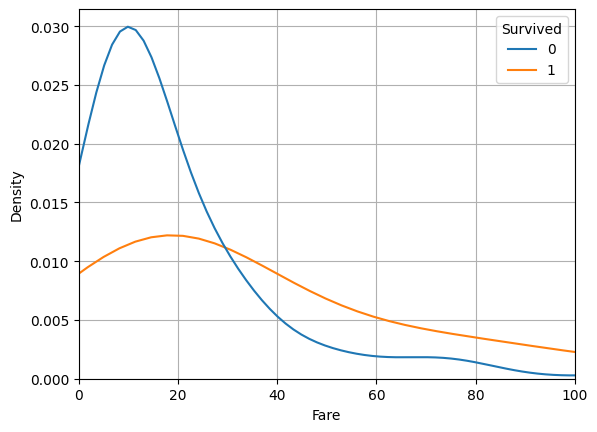

In [37]:
sns.kdeplot(data=df_train,x='Fare',hue="Survived", common_norm=False)
plt.grid()
plt.xlim(0,100)
plt.show()

results: 
1. who ever paid more survived
2. 30 more

### Did women had more chance?

In [38]:
pivot_survival_rate(df_train,'Sex')

|    | Sex    |   not_survived |   survived |   passengers |   survived_rate |
|---:|:-------|---------------:|-----------:|-------------:|----------------:|
|  0 | female |             81 |        233 |          314 |         74.2038 |
|  1 | male   |            468 |        109 |          577 |         18.8908 |


female had more survival rate

### Did port of embarkation influence the survival rate?

In [39]:
pivot_survival_rate(df_train, "Embarked")

|    | Embarked   |   not_survived |   survived |   passengers |   survived_rate |
|---:|:-----------|---------------:|-----------:|-------------:|----------------:|
|  0 | C          |             75 |         93 |          168 |         55.3571 |
|  1 | Q          |             47 |         30 |           77 |         38.961  |
|  2 | S          |            427 |        217 |          644 |         33.6957 |


C had more chance

### survival rate for sex and pclass

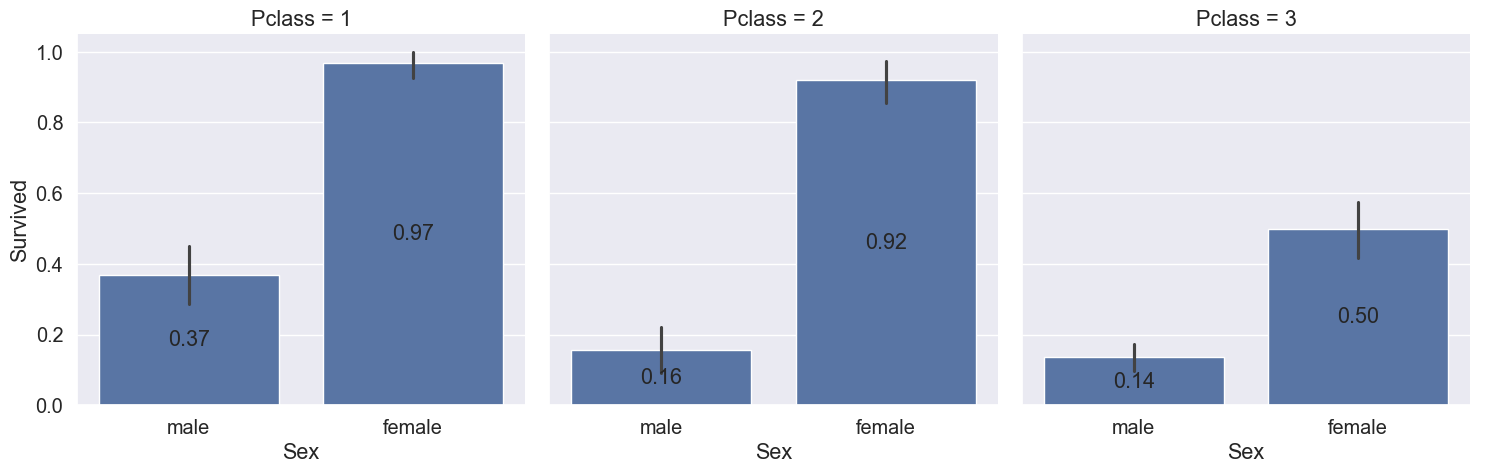

In [42]:
sns.set(font_scale=1.3)
g = sns.catplot(x="Sex",y="Survived",col="Pclass",data=df_train, kind="bar")

for i in range(3):
    ax = g.facet_axis(0,i)
    
    for c in ax.containers:
        labels = [f'{(v.get_height()):.2f}' for v in c]
        ax.bar_label(c,labels=labels,label_type='center')

plt.show()

results: 
1. almost all female passengers of the first class (97%) as well as the second class (92%) survived. 
2. female passengers of 3rd class had higher chance than male
3. male from 1st class had more chance then male from 2nd and 1st
4. second and third male survial does not differ much

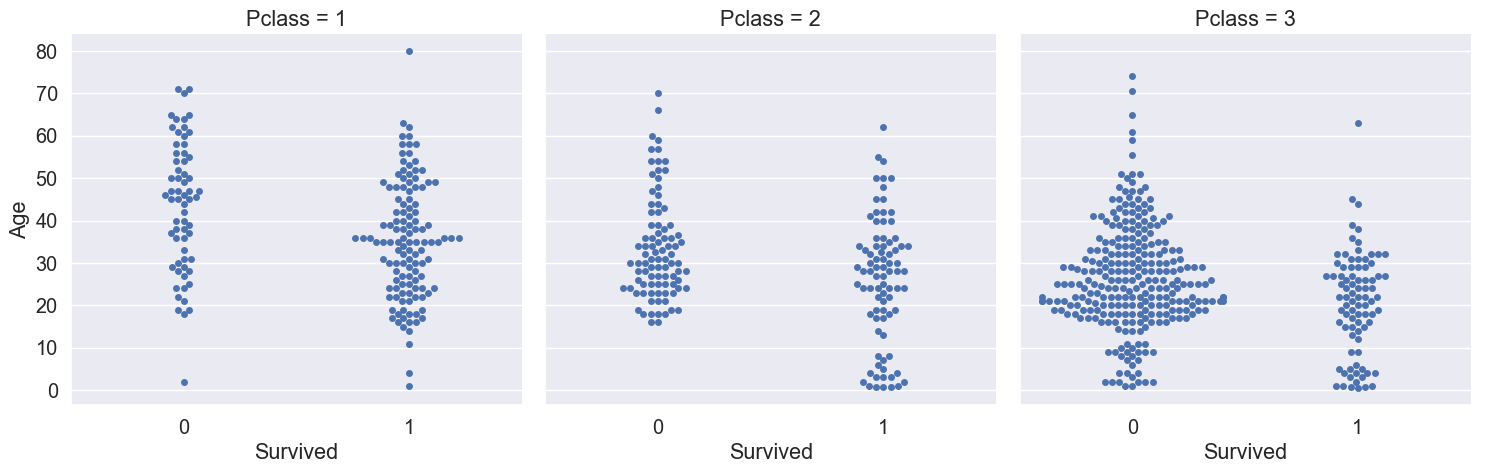

In [43]:
g = sns.catplot(x = "Survived", y="Age", col="Pclass", data=df_train,kind="swarm")
plt.show()

### Survival rate for selected categorical and numerical features

catplot for categorical
kdplot for numerical features

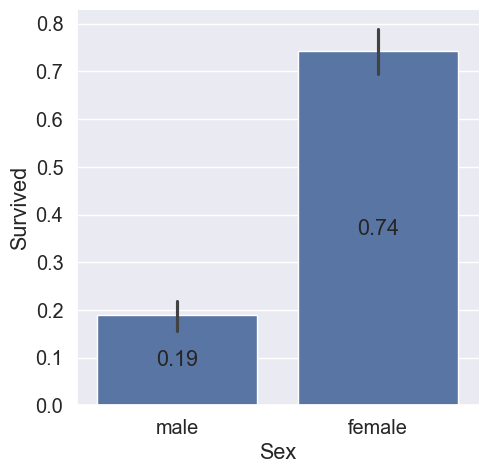

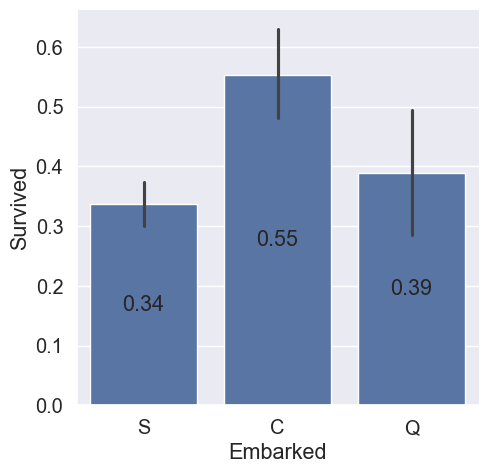

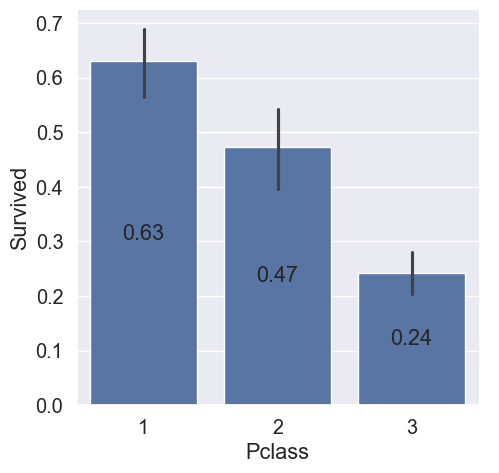

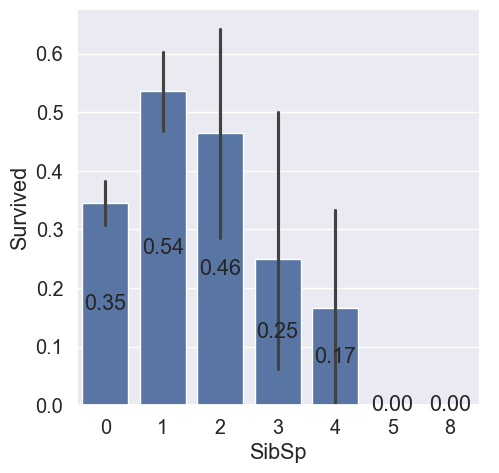

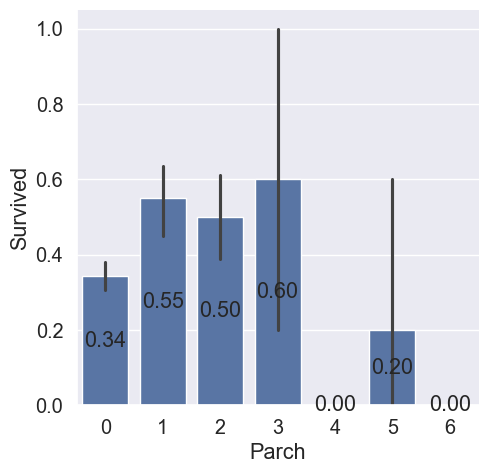

In [44]:
for feature in ["Sex","Embarked","Pclass","SibSp","Parch"]:
    g = sns.catplot(x=feature,y="Survived", data=df_train,kind="bar")
    
    ax = g.facet_axis(0,-1)
    
    for c in ax.containers: 
        labels = [f'{(v.get_height()):.2f}' for v in c]
        ax.bar_label(c, labels=labels, label_type='center')
    
    plt.show()

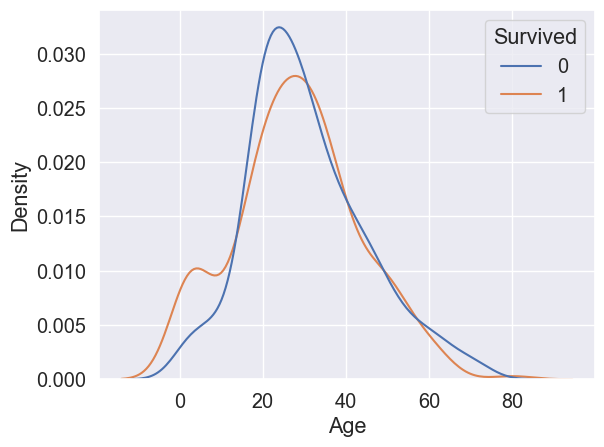

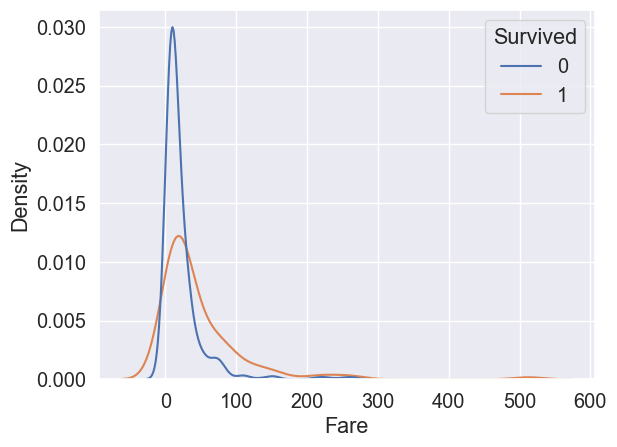

In [45]:
for feature in ["Age","Fare"]:
    g = sns.kdeplot(data = df_train, x=feature, hue="Survived", common_norm=False)
    plt.show()

### save files

In [46]:
df_train.to_pickle('df_train.pkl')
df_test.to_pickle('df_test.pkl')